In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('crimes')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, num_models = 5, hidden_layers = [50, 50], learning_rate = 0.003, tanh = True, calibration_threshold = .03, exp_decay = .998)

initial loss:  7.5122857093811035
nllk loss:  tensor(-0.1013, grad_fn=<MeanBackward0>) kernel loss: tensor(2.5379, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.5280, grad_fn=<MeanBackward0>) kernel loss: tensor(17.5610, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.2842, grad_fn=<MeanBackward0>) kernel loss: tensor(18.6063, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6795, grad_fn=<MeanBackward0>) kernel loss: tensor(13.1131, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8577, grad_fn=<MeanBackward0>) kernel loss: tensor(11.3227, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.9683, grad_fn=<MeanBackward0>) kernel loss: tensor(12.2643, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.9703, grad_fn=<MeanBackward0>) kernel loss: tensor(11.6363, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.0105, grad_fn=<MeanBackward0>) kernel loss: tensor(12.7744, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.0650, grad_fn=<MeanBackward0>) kernel loss: tensor(6.1334, grad_fn=<AddBackward0>)
nllk loss:  te

nllk loss:  tensor(-2.6757, grad_fn=<MeanBackward0>) kernel loss: tensor(4.0797, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7454, grad_fn=<MeanBackward0>) kernel loss: tensor(1.9870, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7991, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3185, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7739, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7526, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8019, grad_fn=<MeanBackward0>) kernel loss: tensor(2.6195, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8264, grad_fn=<MeanBackward0>) kernel loss: tensor(2.6463, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8438, grad_fn=<MeanBackward0>) kernel loss: tensor(1.8238, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8822, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7826, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8794, grad_fn=<MeanBackward0>) kernel loss: tensor(2.8217, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8987, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.1642, grad_fn=<MeanBackward0>) kernel loss: tensor(1.6026, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1590, grad_fn=<MeanBackward0>) kernel loss: tensor(2.3092, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1511, grad_fn=<MeanBackward0>) kernel loss: tensor(1.9508, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1750, grad_fn=<MeanBackward0>) kernel loss: tensor(2.0137, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1225, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3782, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1854, grad_fn=<MeanBackward0>) kernel loss: tensor(1.9482, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1694, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2203, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2146, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3287, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1984, grad_fn=<MeanBackward0>) kernel loss: tensor(1.9356, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1635, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.3809, grad_fn=<MeanBackward0>) kernel loss: tensor(1.6887, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4065, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5650, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4118, grad_fn=<MeanBackward0>) kernel loss: tensor(3.4020, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3838, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4561, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3472, grad_fn=<MeanBackward0>) kernel loss: tensor(1.6678, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4054, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4930, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4646, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1323, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4486, grad_fn=<MeanBackward0>) kernel loss: tensor(1.8546, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.3837, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4763, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4108, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.5003, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9011, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4987, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5334, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4901, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4459, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4880, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7698, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4938, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3292, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4949, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0195, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4844, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9740, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.4781, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0970, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5012, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4396, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5084, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.5529, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4136, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5630, grad_fn=<MeanBackward0>) kernel loss: tensor(1.8710, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5780, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2302, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5900, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7752, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5793, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5181, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5913, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0440, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5871, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7694, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5837, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6831, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5889, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4653, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.5967, grad_fn=<MeanBackward0>) ke

End2end test MAPE:  0.70940816
End2end test RMSE:  0.13478626
End2end test NLLK:  -3.0657845
End2end test CRPS:  tensor(0.0649)


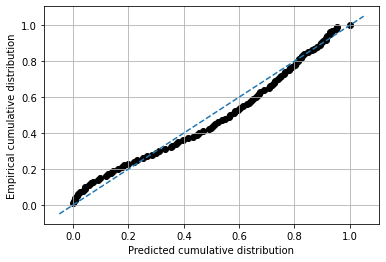

End2end test calibration error when step size is 0.001:  1.8108315586568957
End2end test calibration error when step size is 0.01:  0.18279571197577435
End2end test calibration error when step size is 0.1:  0.0174510078214681


In [4]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.93it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.01it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 10.91it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.089
  RMSE          0.135
  MDAE          0.059
  MARPD         47.113
  R2            0.635
  Correlation   0.801
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.032
  Mean-absolute Calibration Error       0.025
  Miscalibration Area                   0.026
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.078
     Group Size: 0.56 -- Calibration Error: 0.040
     Group Size: 1.00 -- Calibration Error: 0.025
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.096
     Group Size: 0.56 -- Calibration Error: 0.048
     Group Size: 1.00 -- Calibration Error: 0.032
===============

Lims is None. Setting lims now:
min_max_true: (0.0, 1.0)
min_max_pred: (0.021350801, 0.8747213)
lims: (0.0, 1.0)
lims_ext: (-0.1, 1.1)


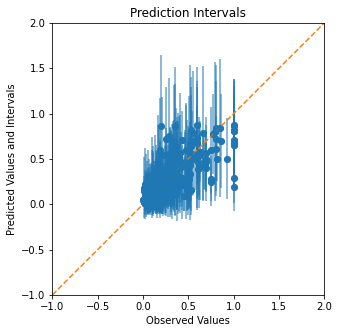

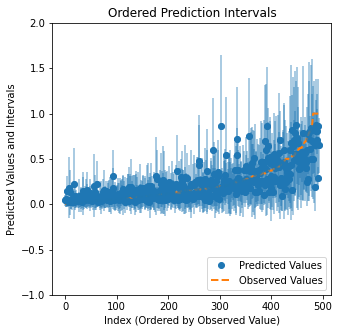

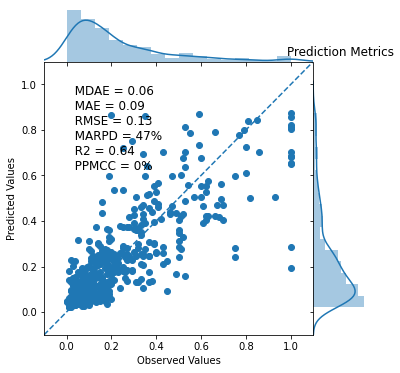

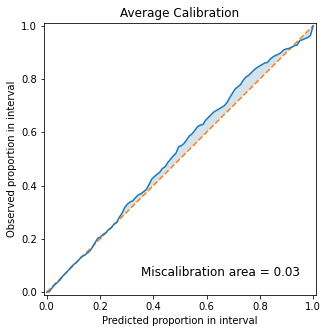

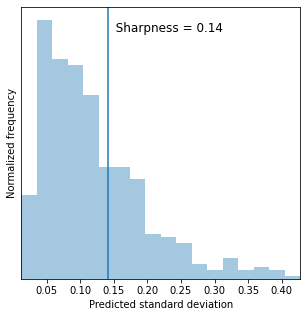

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))